In [8]:
# carrega modelo do classificador
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [22]:
import numpy as np
X = np.load('Banco de dados/Num.npy')
y = np.load('Banco de dados/Target.npy')

# no mnist o digito é escrito em branco (255) no fundo preto (0), essa
# inversão é feita com Vetores = -Vetores + 255, além disso é
# preciso normalizar a escala 0:255 entre 0 e 1, por isso a divisão por 255
#for i in np.arange(len(X)):
#    X[i] = (X[i])/255
X = X/255
X = -X + 1

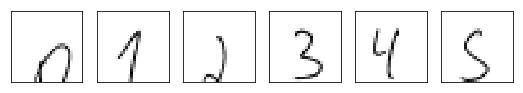

In [24]:
# plota imagens do mnist em cima e as nossas embaixo, para comparação
fig = plt.figure(figsize = [9,3])
for i in np.arange(6):
        plt.subplot(1, 6, i+1, xticks = [], yticks = [])
        plt.imshow(np.reshape(X[i+520], (28,28)), cmap=plt.cm.gray_r)

In [25]:
np.shape(X)

(900, 784)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
# cria classificador usando uma rede neural
clf = MLPClassifier(hidden_layer_sizes=(100),activation='relu', max_iter=55, alpha=1e-4,
                    solver='lbfgs', verbose=False, tol=1e-4, random_state=6,
                    learning_rate_init=.1)
clf.fit(X_train, y_train)

clf.score(X_test, y_test, sample_weight=None)

0.48333333333333334

In [28]:
%run -i 'separa_algarismos.ipynb'

In [29]:
np.shape(clf.predict_proba(Vetores[0:6]))

(6, 10)